In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


df = pd.read_csv("D:\Internship 4 week\Week_1\project_week2\crop_yield_50000.csv")
print("Dataset Shape:", df.shape)
print(df.head())




<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
C:\Users\harsh\AppData\Local\Temp\ipykernel_9304\355683180.py:11: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("D:\Internship 4 week\Week_1\project_week2\crop_yield_50000.csv")


Dataset Shape: (50000, 10)
  Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0  North      Loam   Maize   269.628359            33.568049             True   
1  South      Silt  Barley   277.096946            31.503174            False   
2  South    Chalky   Maize   872.538244            34.665578            False   
3  North      Loam   Wheat   475.905625            28.462172            False   
4  North      Clay    Rice   381.067981            19.256107             True   

   Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
0             True             Sunny       100.778743                5.015345  
1             True             Rainy        90.869031                2.850527  
2            False             Sunny        84.610447                5.698175  
3             True             Sunny        97.719303                3.840846  
4            False            Cloudy        68.468178                3.166763  


In [2]:

le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

categorical_features = ["Region", "Soil_Type", "Weather_Condition"]
df = pd.get_dummies(df, columns=categorical_features)

# Example interaction feature: Rainfall × Temperature
df['Rainfall_Temp'] = df['Rainfall_mm'] * df['Temperature_Celsius']

X = df.drop('Crop', axis=1)
y = df['Crop']

# Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


best_model = grid.best_estimator_
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
for train_idx, val_idx in cv.split(X_train, y_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    best_model.fit(X_t, y_t)
    preds = best_model.predict(X_v)
    acc = accuracy_score(y_v, preds)
    accuracies.append(acc)

print(f"Cross Validation Accuracy: {np.mean(accuracies):.4f}")


y_pred = best_model.predict(X_test)
print("✅ Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross Validation Accuracy: 0.3494
✅ Final Accuracy: 0.345

Classification Report:
               precision    recall  f1-score   support

      Barley       0.37      0.38      0.38      1666
      Cotton       0.38      0.39      0.38      1668
       Maize       0.35      0.36      0.36      1701
        Rice       0.36      0.36      0.36      1662
     Soybean       0.38      0.38      0.38      1658
       Wheat       0.21      0.19      0.20      1645

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000



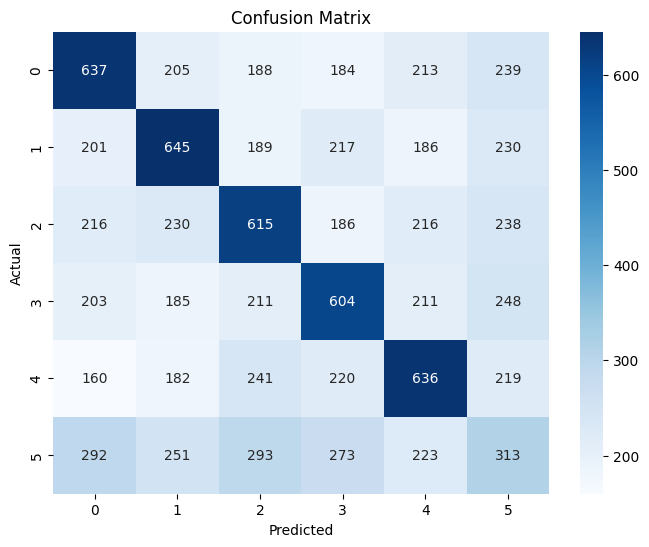

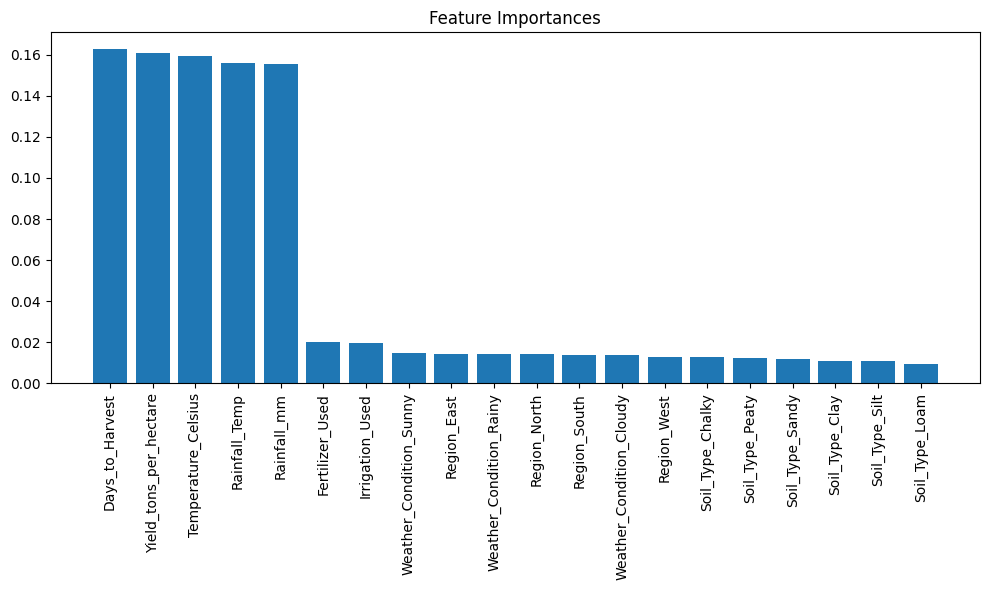

In [3]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


try:
    df = pd.read_csv('crop_yield_50000.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'crop_yield_50000.csv' not found. Please ensure the file is in the same directory.")
    exit()


print("\n--- Dataset Information ---")
print(df.info())
print("\n--- First 5 Rows ---")
print(df.head())



Dataset loaded successfully.

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  50000 non-null  object 
 1   Soil_Type               50000 non-null  object 
 2   Crop                    50000 non-null  object 
 3   Rainfall_mm             50000 non-null  float64
 4   Temperature_Celsius     50000 non-null  float64
 5   Fertilizer_Used         50000 non-null  bool   
 6   Irrigation_Used         50000 non-null  bool   
 7   Weather_Condition       50000 non-null  object 
 8   Days_to_Harvest         50000 non-null  float64
 9   Yield_tons_per_hectare  50000 non-null  float64
dtypes: bool(2), float64(4), object(4)
memory usage: 3.1+ MB
None

--- First 5 Rows ---
  Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0  North      Loam   Maize  

In [5]:
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
categorical_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
boolean_features = ['Fertilizer_Used', 'Irrigation_Used']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining on {len(X_train)} samples, testing on {len(X_test)} samples.")

print("\nTraining the Model")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

print("\nEvaluating Model Performance ")
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Training on 40000 samples, testing on 10000 samples.

Training the Model
Model training complete.

Evaluating Model Performance 
Mean Absolute Error (MAE): 0.3993
R-squared (R²): 0.9093
